# Forest Fires Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import shapiro, f_oneway
from statsmodels.stats.multicomp import MultiComparison

## 1. Exploratory Data Analysis

We begin by loading our data set into a data frame using pandas.

In [3]:
df = pd.read_csv('forest_fires_bejaia.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


Before we proceed, we can see using the "columns" command that there are some extra spaces on the heading of the last column. We will need to correct this before we begin our analysis

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [16]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

For an initial analysis we use the "describe" command.

In [17]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,8.843274,1.115259,0.0,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,16.000000,7.500000,2012.0,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,23.000000,8.000000,2012.0,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


We can see that there are no missing values or unexpected negative values

Next we can count and plot on how many days there were fires and on how many there weren't.

In [18]:
np.unique(df['Classes'], return_counts=True)

(array(['fire', 'fire ', 'fire   ', 'not fire', 'not fire ', 'not fire   '],
       dtype=object),
 array([ 4,  2, 53,  2,  1, 60], dtype=int64))

The entries in this column are also suffering from leading and trailing spaces, we will have to correct this.

In [20]:
df['Classes'] = df['Classes'].str.strip()
np.unique(df['Classes'], return_counts=True)

(array(['fire', 'not fire'], dtype=object), array([59, 63], dtype=int64))

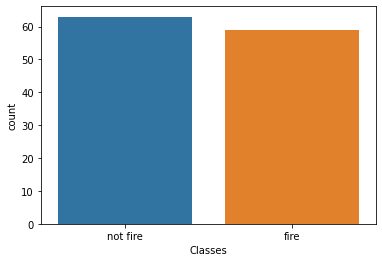

In [21]:
sns.countplot(x = df['Classes']);

We obtain that there were fires on 59 out of 122 days.

We can now plot histograms for the atmospheric condition attributes to see how they behaved during this time.

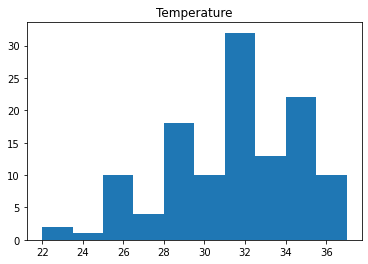

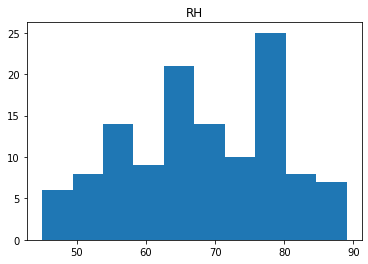

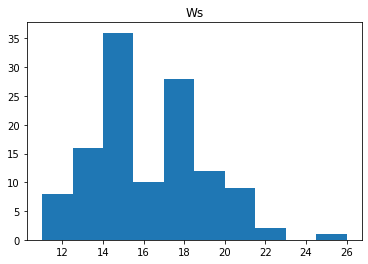

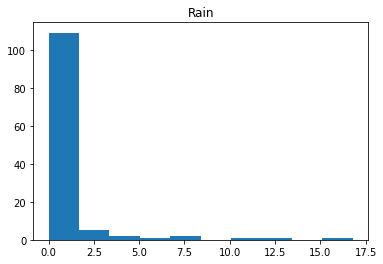

In [39]:
for i in ['Temperature', 'RH', 'Ws', 'Rain']:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

This by itself doesn't give us a lot of information relating these attributes to the fires. However, if we split our data frames in two, one only with when there was fire and one without, we can see how these attributes changed.

In [45]:
df_fire = df.loc[(df['Classes'] == 'fire')]
df_notfire = df.loc[(df['Classes'] == 'not fire')]

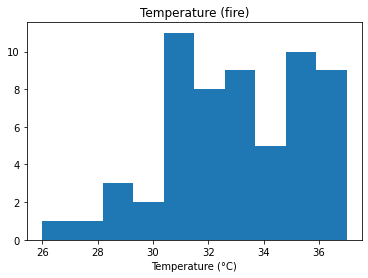

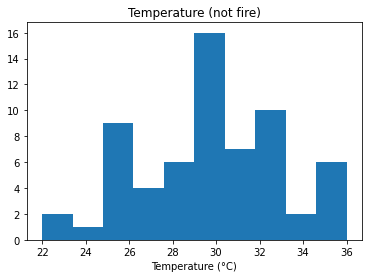

In [60]:
plt.hist(df_fire['Temperature'])
plt.title('Temperature (fire)')
plt.xlabel('Temperature (°C)')
plt.show()
plt.hist(df_notfire['Temperature'])
plt.title('Temperature (not fire)')
plt.xlabel('Temperature (°C)')
plt.show()

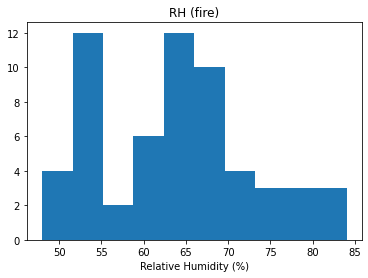

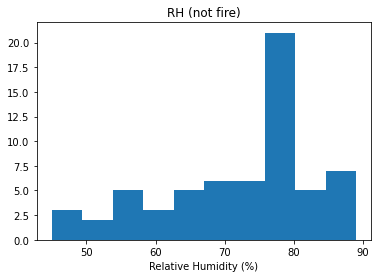

In [61]:
plt.hist(df_fire['RH'])
plt.title('RH (fire)')
plt.xlabel('Relative Humidity (%)')
plt.show()
plt.hist(df_notfire['RH'])
plt.title('RH (not fire)')
plt.xlabel('Relative Humidity (%)')
plt.show()

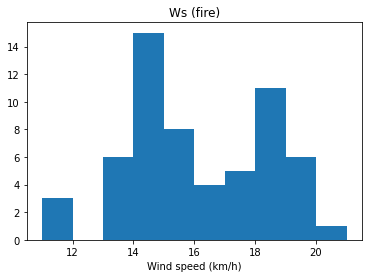

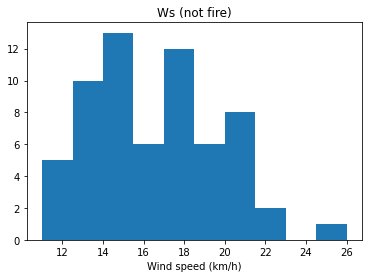

In [62]:
plt.hist(df_fire['Ws'])
plt.title('Ws (fire)')
plt.xlabel('Wind speed (km/h)')
plt.show()
plt.hist(df_notfire['Ws'])
plt.title('Ws (not fire)')
plt.xlabel('Wind speed (km/h)')
plt.show()

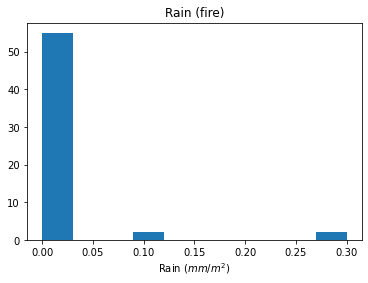

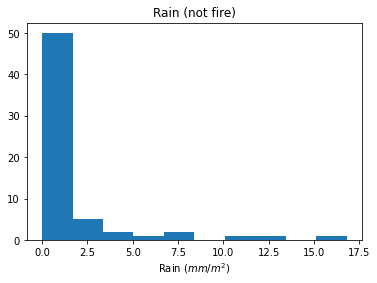

In [69]:
plt.hist(df_fire['Rain'])
plt.title('Rain (fire)')
plt.xlabel(r'Rain ($mm/m^2$)')
plt.show()
plt.hist(df_notfire['Rain'])
plt.title('Rain (not fire)')
plt.xlabel(r'Rain ($mm/m^2$)')
plt.show()

Finally, we can calculate the average of these attributes for days with or without fire.

In [52]:
df.groupby(['Classes']).mean()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Classes,,,,,,,,,,,,,
fire,18.542373,7.423729,2012.0,32.881356,63.644068,15.644068,0.013559,86.579661,19.472881,84.516949,6.242373,24.550847,10.537288
not fire,13.142857,7.571429,2012.0,29.587302,72.031746,16.333333,1.619048,63.522222,5.611111,23.795238,1.233333,6.880952,0.933333


From the histograms and the averages, we can see that days with fire were characterized by higher temperatures, lower relative humidity, (slightly) lower wind speed and less rain.

## 2. Preprocessing

Our next step in to prepare the data for the machine learning algorithms. We first separate our class from our predicting attributes.

In [54]:
X_df = df.drop(columns=['Classes'])
y_df = df['Classes']
X_df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

We are interested in predicting forest fires using only atmospheric data, so let us drop all columns from X_df except for "Temperature", "RH", "Ws" and "Rain".

In [55]:
X_df = X_df[['Temperature', 'RH', 'Ws', 'Rain']]
X_df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain'], dtype='object')

All of the predicting attributes are already numerical, so there is no need to employ the label encoder and the one hot encoder.

Since the values of different attributes are in different scales, let us now use the standard scaler to standardize them.

In [58]:
scaler_df = StandardScaler()
X_df = scaler_df.fit_transform(X_df)
X_df

array([[-6.59353733e-01, -9.88010013e-01,  7.04943267e-01,
        -3.51193273e-01],
       [-6.59353733e-01, -6.27928694e-01, -1.05741490e+00,
         1.90628255e-01],
       [-1.56658481e+00,  1.26249823e+00,  2.11482980e+00,
         5.10870058e+00],
       [-1.86899517e+00,  1.89264054e+00, -1.05741490e+00,
         6.90771204e-01],
       [-1.26417445e+00,  8.12396582e-01,  0.00000000e+00,
        -3.51193273e-01],
       [-5.45330155e-02, -8.78067151e-02, -7.04943267e-01,
        -3.51193273e-01],
       [ 5.50287702e-01, -1.25807100e+00, -1.05741490e+00,
        -3.51193273e-01],
       [-3.56943374e-01,  4.52315263e-01, -3.52471634e-01,
        -3.51193273e-01],
       [-1.86899517e+00,  1.80262021e+00, -1.05741490e+00,
        -2.67836115e-01],
       [-9.61764092e-01,  9.92437242e-01, -1.40988653e+00,
        -3.51193273e-01],
       [-5.45330155e-02, -2.67847375e-01, -7.04943267e-01,
        -3.51193273e-01],
       [-1.56658481e+00,  1.17247790e+00,  1.05741490e+00,
      

Now let us save X_df and y_df using pickle.

In [59]:
with open('forest_fires.pkl', mode='wb') as f:
    pickle.dump([X_df, y_df], f)

With this we conclude the preprocessing step.

## 3. Naive Bayes

We can now begin to make predictions on this data set. We will begin with the naive Bayes algorithm.

We first import the preprocessed data.

In [2]:
with open('forest_fires.pkl', mode='rb') as f:
    X_df, y_df = pickle.load(f)

Since the naive Bayes algorithm doesn't have any parameters, we cannot perform their tuning.

We then employ cross validation to test this algorithm with different train-test splits. We will use k=10 (1/10 of the data, in different configurations, is used as test sample) and will employ 30 different divisions.

In [4]:
results_bayes = []
bayes = GaussianNB()
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(bayes, X_df, y_df, cv=kfold)
    results_bayes.append(scores.mean())
results_bayes

[0.8282051282051283,
 0.8192307692307692,
 0.8211538461538461,
 0.8198717948717948,
 0.8173076923076923,
 0.8256410256410256,
 0.8275641025641025,
 0.8121794871794872,
 0.8128205128205128,
 0.8192307692307693,
 0.8198717948717948,
 0.8294871794871795,
 0.7948717948717949,
 0.8102564102564103,
 0.8352564102564102,
 0.8185897435897436,
 0.8205128205128205,
 0.8192307692307693,
 0.8198717948717948,
 0.8185897435897436,
 0.826923076923077,
 0.8211538461538461,
 0.817948717948718,
 0.8185897435897435,
 0.8185897435897436,
 0.8294871794871794,
 0.8192307692307692,
 0.8282051282051281,
 0.8141025641025641,
 0.826923076923077]

## 4. Decision Tree

The next algorithm we are going to test is the decision tree classifier.

In [5]:
with open('forest_fires.pkl', mode='rb') as f:
    X_df, y_df = pickle.load(f)

We first must perform the tuning of the parameters using grid search.

In [6]:
parameters = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 5, 10]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
grid_search.fit(X_df, y_df)
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

Now that we have the best parameters, we use cross validation to obtain the accuracies.

In [7]:
results_tree = []
tree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2, splitter='best')
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(tree, X_df, y_df, cv=kfold)
    results_tree.append(scores.mean())
results_tree

[0.8544871794871793,
 0.8352564102564102,
 0.8371794871794872,
 0.8205128205128205,
 0.8012820512820513,
 0.8339743589743589,
 0.826923076923077,
 0.8371794871794872,
 0.8461538461538461,
 0.8519230769230768,
 0.8596153846153847,
 0.8185897435897436,
 0.8108974358974359,
 0.8596153846153847,
 0.8115384615384617,
 0.8358974358974359,
 0.7942307692307692,
 0.8769230769230768,
 0.8371794871794872,
 0.8339743589743589,
 0.8423076923076923,
 0.8346153846153846,
 0.8435897435897436,
 0.8685897435897436,
 0.8192307692307693,
 0.8384615384615385,
 0.8192307692307693,
 0.8301282051282051,
 0.8358974358974359,
 0.8442307692307693]

## 5. Random Forest

We will now use the random forest classifier.

In [16]:
with open('forest_fires.pkl', 'rb') as f:
    X_df, y_df = pickle.load(f)

First we tune the parameters.

In [17]:
parameters = {'criterion': ['gini', 'entropy'],
             'n_estimators': [10, 40, 100, 150],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 5, 10]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(X_df, y_df)
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 10}

Then we calculate the accuracies with cross validation.

In [18]:
results_forest = []
forest = RandomForestClassifier(criterion='gini', min_samples_leaf=5, min_samples_split=2, n_estimators=10)
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(forest, X_df, y_df, cv=kfold)
    results_forest.append(scores.mean())
results_forest

[0.8602564102564102,
 0.8429487179487178,
 0.8442307692307691,
 0.8288461538461538,
 0.8506410256410257,
 0.8769230769230768,
 0.8519230769230768,
 0.8294871794871794,
 0.8211538461538461,
 0.8769230769230768,
 0.8602564102564102,
 0.8205128205128206,
 0.8448717948717949,
 0.8666666666666666,
 0.8512820512820511,
 0.8358974358974359,
 0.8365384615384617,
 0.8679487179487179,
 0.8532051282051283,
 0.8173076923076923,
 0.8519230769230768,
 0.8358974358974358,
 0.8602564102564102,
 0.8429487179487181,
 0.8358974358974359,
 0.8467948717948717,
 0.851923076923077,
 0.8621794871794872,
 0.8448717948717949,
 0.8525641025641025]

## 6. K Nearest Neighbors (kNN)

Next we will test the kNN classification algorithm.

In [19]:
with open('forest_fires.pkl', 'rb') as f:
    X_df, y_df = pickle.load(f)

We use grid search to tune the parameters.

In [25]:
parameters = {'n_neighbors': [3, 5, 10, 20],
             'p': [1, 2]}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
grid_search.fit(X_df, y_df)
best_parameters = grid_search.best_params_
best_parameters

{'n_neighbors': 5, 'p': 1}

Then we use cross validation to determine the accuracies.

In [21]:
results_knn = []
knn = KNeighborsClassifier(n_neighbors=5, p=1)
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(knn, X_df, y_df, cv=kfold)
    results_knn.append(scores.mean())
results_knn

[0.7371794871794871,
 0.7185897435897436,
 0.7217948717948718,
 0.7288461538461538,
 0.7185897435897435,
 0.7044871794871794,
 0.7615384615384615,
 0.7288461538461538,
 0.6794871794871795,
 0.6974358974358974,
 0.7237179487179487,
 0.7147435897435896,
 0.7384615384615385,
 0.7025641025641025,
 0.717948717948718,
 0.7288461538461539,
 0.7198717948717949,
 0.7371794871794871,
 0.7230769230769231,
 0.7198717948717948,
 0.7205128205128205,
 0.737820512820513,
 0.7044871794871794,
 0.7282051282051283,
 0.7192307692307692,
 0.7064102564102563,
 0.7025641025641026,
 0.7147435897435896,
 0.7153846153846153,
 0.7282051282051281]

## 7. Logistic Regression

We will now test the logistic regression classification algorithm.

In [27]:
with open('forest_fires.pkl', 'rb') as f:
    X_df, y_df = pickle.load(f)

We use grid search to tune the parameters.

In [29]:
parameters = {'tol': [0.0001, 0.00001, 0.000001],
             'C': [1.0, 1.5, 2.0],
             'solver': ['lbfgs', 'sag', 'saga'],
             'max_iter': [500]}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)
grid_search.fit(X_df, y_df)
best_parameters = grid_search.best_params_
best_parameters

{'C': 2.0, 'max_iter': 500, 'solver': 'lbfgs', 'tol': 0.0001}

Then we calculate the accuracies.

In [31]:
results_logistic = []
logistic = LogisticRegression(C=2.0, max_iter=500, solver='lbfgs', tol=0.0001)
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(logistic, X_df, y_df, cv=kfold)
    results_logistic.append(scores.mean())
results_logistic

[0.8032051282051281,
 0.7846153846153847,
 0.7724358974358975,
 0.7852564102564104,
 0.808974358974359,
 0.7955128205128206,
 0.7858974358974358,
 0.8108974358974359,
 0.801923076923077,
 0.7961538461538462,
 0.8044871794871794,
 0.7878205128205129,
 0.7974358974358974,
 0.7846153846153846,
 0.7871794871794872,
 0.7871794871794872,
 0.8032051282051281,
 0.7871794871794872,
 0.7884615384615384,
 0.8019230769230768,
 0.8256410256410257,
 0.7871794871794873,
 0.7948717948717948,
 0.7955128205128206,
 0.7942307692307692,
 0.8038461538461539,
 0.7948717948717949,
 0.8134615384615385,
 0.7814102564102563,
 0.8025641025641026]

## 8. Support Vector Machines (SVM)

Next we will test the SVM classification algorithm.

In [32]:
with open('forest_fires.pkl', 'rb') as f:
    X_df, y_df = pickle.load(f)

We first use grid search to tune the parameters.

In [33]:
parameters = {'tol': [0.001, 0.0001, 0.00001],
             'C': [1.0, 1.5, 2.0],
             'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters)
grid_search.fit(X_df, y_df)
best_parameters = grid_search.best_params_
best_parameters

{'C': 2.0, 'kernel': 'linear', 'tol': 0.001}

Then we use cross validation to determine the accuracies.

In [34]:
results_svm = []
svm = SVC(C=2.0, kernel='linear', tol=0.001)
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(svm, X_df, y_df, cv=kfold)
    results_svm.append(scores.mean())
results_svm

[0.801923076923077,
 0.801923076923077,
 0.828846153846154,
 0.817948717948718,
 0.808974358974359,
 0.8115384615384615,
 0.8282051282051283,
 0.8525641025641025,
 0.7865384615384615,
 0.8038461538461539,
 0.8371794871794872,
 0.7891025641025642,
 0.7967948717948719,
 0.8262820512820515,
 0.785897435897436,
 0.8025641025641026,
 0.7948717948717949,
 0.8032051282051281,
 0.8448717948717949,
 0.7846153846153846,
 0.8346153846153846,
 0.8365384615384615,
 0.7615384615384616,
 0.7871794871794873,
 0.8102564102564103,
 0.8371794871794872,
 0.8025641025641026,
 0.8211538461538461,
 0.8134615384615385,
 0.8102564102564103]

## 9. Neural Network

The final algorithm we are going to test is the multi-layer perceptron classifier.

In [35]:
with open('forest_fires.pkl', 'rb') as f:
    X_df, y_df = pickle.load(f)

We use grid search to find the best parameters.

In [43]:
parameters = {'activation': ['relu', 'logistic', 'tanh'],
             'solver': ['adam', 'sgd'],
             'batch_size': [10, 56],
             'hidden_layer_sizes': [[100], [3, 3]],
             'max_iter': [2000],
             'tol': [0.001]}
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters)
grid_search.fit(X_df, y_df)
best_parameters = grid_search.best_params_
best_parameters

{'activation': 'tanh',
 'batch_size': 10,
 'hidden_layer_sizes': [100],
 'max_iter': 2000,
 'solver': 'adam',
 'tol': 0.001}

Then we use cross validation to calculate the accuracies.

In [44]:
results_neural = []
neural = MLPClassifier(activation='tanh', batch_size=10, hidden_layer_sizes=[100], max_iter=2000, solver='adam', tol=0.001)
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(neural, X_df, y_df, cv=kfold)
    results_neural.append(scores.mean())
results_neural

[0.860897435897436,
 0.8435897435897436,
 0.8788461538461538,
 0.8532051282051281,
 0.8673076923076923,
 0.8429487179487181,
 0.8525641025641025,
 0.8685897435897434,
 0.8538461538461538,
 0.8442307692307691,
 0.8775641025641026,
 0.8698717948717949,
 0.8371794871794871,
 0.85,
 0.8429487179487181,
 0.8602564102564102,
 0.8775641025641026,
 0.8679487179487181,
 0.8615384615384615,
 0.8429487179487181,
 0.8762820512820513,
 0.8782051282051281,
 0.8282051282051281,
 0.8525641025641025,
 0.8512820512820513,
 0.8878205128205128,
 0.8519230769230768,
 0.8621794871794872,
 0.8628205128205128,
 0.851923076923077]

## 10. Comparing the Algorithms

Now that we have the accuracies for different algorithms, we can compare them and see which one performed best.

In [45]:
results_bayes = [0.8282051282051283,
 0.8192307692307692,
 0.8211538461538461,
 0.8198717948717948,
 0.8173076923076923,
 0.8256410256410256,
 0.8275641025641025,
 0.8121794871794872,
 0.8128205128205128,
 0.8192307692307693,
 0.8198717948717948,
 0.8294871794871795,
 0.7948717948717949,
 0.8102564102564103,
 0.8352564102564102,
 0.8185897435897436,
 0.8205128205128205,
 0.8192307692307693,
 0.8198717948717948,
 0.8185897435897436,
 0.826923076923077,
 0.8211538461538461,
 0.817948717948718,
 0.8185897435897435,
 0.8185897435897436,
 0.8294871794871794,
 0.8192307692307692,
 0.8282051282051281,
 0.8141025641025641,
 0.826923076923077]
results_tree = [0.8544871794871793,
 0.8352564102564102,
 0.8371794871794872,
 0.8205128205128205,
 0.8012820512820513,
 0.8339743589743589,
 0.826923076923077,
 0.8371794871794872,
 0.8461538461538461,
 0.8519230769230768,
 0.8596153846153847,
 0.8185897435897436,
 0.8108974358974359,
 0.8596153846153847,
 0.8115384615384617,
 0.8358974358974359,
 0.7942307692307692,
 0.8769230769230768,
 0.8371794871794872,
 0.8339743589743589,
 0.8423076923076923,
 0.8346153846153846,
 0.8435897435897436,
 0.8685897435897436,
 0.8192307692307693,
 0.8384615384615385,
 0.8192307692307693,
 0.8301282051282051,
 0.8358974358974359,
 0.8442307692307693]
results_forest = [0.8602564102564102,
 0.8429487179487178,
 0.8442307692307691,
 0.8288461538461538,
 0.8506410256410257,
 0.8769230769230768,
 0.8519230769230768,
 0.8294871794871794,
 0.8211538461538461,
 0.8769230769230768,
 0.8602564102564102,
 0.8205128205128206,
 0.8448717948717949,
 0.8666666666666666,
 0.8512820512820511,
 0.8358974358974359,
 0.8365384615384617,
 0.8679487179487179,
 0.8532051282051283,
 0.8173076923076923,
 0.8519230769230768,
 0.8358974358974358,
 0.8602564102564102,
 0.8429487179487181,
 0.8358974358974359,
 0.8467948717948717,
 0.851923076923077,
 0.8621794871794872,
 0.8448717948717949,
 0.8525641025641025]
results_knn = [0.7371794871794871,
 0.7185897435897436,
 0.7217948717948718,
 0.7288461538461538,
 0.7185897435897435,
 0.7044871794871794,
 0.7615384615384615,
 0.7288461538461538,
 0.6794871794871795,
 0.6974358974358974,
 0.7237179487179487,
 0.7147435897435896,
 0.7384615384615385,
 0.7025641025641025,
 0.717948717948718,
 0.7288461538461539,
 0.7198717948717949,
 0.7371794871794871,
 0.7230769230769231,
 0.7198717948717948,
 0.7205128205128205,
 0.737820512820513,
 0.7044871794871794,
 0.7282051282051283,
 0.7192307692307692,
 0.7064102564102563,
 0.7025641025641026,
 0.7147435897435896,
 0.7153846153846153,
 0.7282051282051281]
results_logistic = [0.8032051282051281,
 0.7846153846153847,
 0.7724358974358975,
 0.7852564102564104,
 0.808974358974359,
 0.7955128205128206,
 0.7858974358974358,
 0.8108974358974359,
 0.801923076923077,
 0.7961538461538462,
 0.8044871794871794,
 0.7878205128205129,
 0.7974358974358974,
 0.7846153846153846,
 0.7871794871794872,
 0.7871794871794872,
 0.8032051282051281,
 0.7871794871794872,
 0.7884615384615384,
 0.8019230769230768,
 0.8256410256410257,
 0.7871794871794873,
 0.7948717948717948,
 0.7955128205128206,
 0.7942307692307692,
 0.8038461538461539,
 0.7948717948717949,
 0.8134615384615385,
 0.7814102564102563,
 0.8025641025641026]
results_svm = [0.801923076923077,
 0.801923076923077,
 0.828846153846154,
 0.817948717948718,
 0.808974358974359,
 0.8115384615384615,
 0.8282051282051283,
 0.8525641025641025,
 0.7865384615384615,
 0.8038461538461539,
 0.8371794871794872,
 0.7891025641025642,
 0.7967948717948719,
 0.8262820512820515,
 0.785897435897436,
 0.8025641025641026,
 0.7948717948717949,
 0.8032051282051281,
 0.8448717948717949,
 0.7846153846153846,
 0.8346153846153846,
 0.8365384615384615,
 0.7615384615384616,
 0.7871794871794873,
 0.8102564102564103,
 0.8371794871794872,
 0.8025641025641026,
 0.8211538461538461,
 0.8134615384615385,
 0.8102564102564103]
results_neural = [0.860897435897436,
 0.8435897435897436,
 0.8788461538461538,
 0.8532051282051281,
 0.8673076923076923,
 0.8429487179487181,
 0.8525641025641025,
 0.8685897435897434,
 0.8538461538461538,
 0.8442307692307691,
 0.8775641025641026,
 0.8698717948717949,
 0.8371794871794871,
 0.85,
 0.8429487179487181,
 0.8602564102564102,
 0.8775641025641026,
 0.8679487179487181,
 0.8615384615384615,
 0.8429487179487181,
 0.8762820512820513,
 0.8782051282051281,
 0.8282051282051281,
 0.8525641025641025,
 0.8512820512820513,
 0.8878205128205128,
 0.8519230769230768,
 0.8621794871794872,
 0.8628205128205128,
 0.851923076923077]

In [46]:
results = pd.DataFrame({'Bayes': results_bayes,
                        'Tree': results_tree,
                        'Forest': results_forest,
                        'KNN': results_knn,
                        'Logistic': results_logistic,
                        'SVM': results_svm,
                        'Neural': results_neural})
results.describe()

,Bayes,Tree,Forest,KNN,Logistic,SVM,Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.820363,0.835321,0.847436,0.720021,0.795598,0.810748,0.858568
std,0.007490,0.018684,0.015490,0.015403,0.011153,0.020979,0.014393
min,0.794872,0.794231,0.817308,0.679487,0.772436,0.761538,0.828205
25%,0.818590,0.822115,0.836058,0.714744,0.787179,0.798077,0.850321
50%,0.819551,0.835897,0.848718,0.719872,0.795192,0.809615,0.857051
75%,0.826603,0.844071,0.858494,0.728686,0.803045,0.827724,0.868429
max,0.835256,0.876923,0.876923,0.761538,0.825641,0.852564,0.887821


Comparing the mean accuracies and their standard deviations, it seems that the neural networks classifier had the best performance. However, before we conclude this, we must verify if the results are statistically distinct from each other.

We can do this by using the ANOVA and Tukey tests, but these tests are only meant to compare normaly distributed data. Therefore, we use the Shapiro test to check if the data is normaly distributed (null hypothesis) or not (alternative hypothesis).

In [47]:
print(shapiro(results_bayes))
print(shapiro(results_tree))
print(shapiro(results_forest))
print(shapiro(results_knn))
print(shapiro(results_logistic))
print(shapiro(results_svm))
print(shapiro(results_neural))

ShapiroResult(statistic=0.8957853317260742, pvalue=0.006634310353547335)
ShapiroResult(statistic=0.9803633689880371, pvalue=0.8351332545280457)
ShapiroResult(statistic=0.9760259389877319, pvalue=0.7129378914833069)
ShapiroResult(statistic=0.9599725604057312, pvalue=0.30927520990371704)
ShapiroResult(statistic=0.963365912437439, pvalue=0.3764815628528595)
ShapiroResult(statistic=0.9777230620384216, pvalue=0.7623244524002075)
ShapiroResult(statistic=0.9733095765113831, pvalue=0.6330934166908264)


We obtain that only the results for the naive Bayes classifier are not normally distributed, since they are the only ones with p-value below 0.05. Let us plot these results.

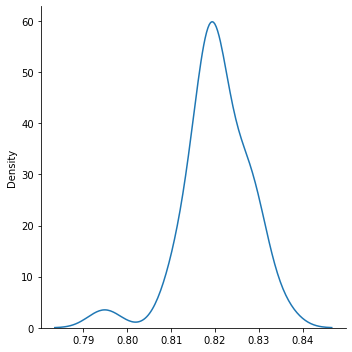

In [50]:
sns.displot(results_bayes, kind='kde');

We can see that the results are still approximately normal, so we will proceed with the ANOVA and Tukey tests.

The ANOVA test will compare all of the algorithms and determine whether they are statistically the same (null hypothesis) or statistically distinct (alternative hypothesis).

In [51]:
print(f_oneway(results_bayes, results_tree, results_forest, results_knn, results_logistic, results_svm, results_neural))

F_onewayResult(statistic=270.13575116948067, pvalue=6.990546110979192e-94)


Since the p-value is below 0.05, we conclude that the results are statistically distinct.

Finally, we use the Tukey test to compare each set of results with each other and determine whether they are statistically the same (null hypothesis) or statistically distinct (alternative hypothesis).

In [52]:
results_algorithms = {'accuracy': np.concatenate([results_bayes, results_tree, results_forest, results_knn, results_logistic, results_svm, results_neural]),
                      'algorithm': ['bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 'bayes', 
                                    'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree',
                                    'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 
                                    'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 
                                    'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 
                                    'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 
                                    'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural']}
results_df = pd.DataFrame(results_algorithms)
results_df

,accuracy,algorithm
0,0.828205,bayes
1,0.819231,bayes
2,0.821154,bayes
3,0.819872,bayes
4,0.817308,bayes
...,...,...
205,0.887821,neural
206,0.851923,neural
207,0.862179,neural
208,0.862821,neural


In [53]:
compare_algorithms = MultiComparison(results_df['accuracy'], results_df['algorithm'])
print(compare_algorithms.tukeyhsd())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
   bayes   forest   0.0271    0.0  0.0153  0.0389   True
   bayes      knn  -0.1003    0.0 -0.1122 -0.0885   True
   bayes logistic  -0.0248    0.0 -0.0366 -0.0129   True
   bayes   neural   0.0382    0.0  0.0264    0.05   True
   bayes      svm  -0.0096 0.1946 -0.0214  0.0022  False
   bayes     tree    0.015  0.004  0.0031  0.0268   True
  forest      knn  -0.1274    0.0 -0.1392 -0.1156   True
  forest logistic  -0.0518    0.0 -0.0637   -0.04   True
  forest   neural   0.0111 0.0795 -0.0007   0.023  False
  forest      svm  -0.0367    0.0 -0.0485 -0.0249   True
  forest     tree  -0.0121 0.0405 -0.0239 -0.0003   True
     knn logistic   0.0756    0.0  0.0638  0.0874   True
     knn   neural   0.1385    0.0  0.1267  0.1504   True
     knn      svm   0.0907    0.0  0.0789  0.1025   True
     knn     tree   0.1153    0

Thus, we obtain that the sets of results for the random forest and neural network classifiers are not statistically distinct from each other. Therefore, since the random forest algorithm is simpler and faster to run, we may choose it as the best suited one for this problem.